![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

# 04 | Hyperparameter Tuning with Cross Validation

## Load the Data

- The goal of this dataset is
- To predict if **bank's customers** (rows) `default` next month
- Based on their **socio-demographical characteristics** (columns)

In [3]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df_default = pd.read_excel(io=url, header=1, index_col=0)
df_default.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
23022,220000,2,2,1,40,-1,-1,-1,-1,0,0,1129,227,0,13137,13637,9744,227,0,13137,1500,214,0,0
25406,150000,2,1,2,27,-1,3,2,-1,-1,-1,942,616,290,326,740,17481,0,0,362,740,17481,1000,1
25492,60000,2,3,2,22,-1,-1,-1,-1,0,0,4049,1808,3496,11548,14519,5861,1815,3496,11548,3500,200,1100,0
18960,300000,2,2,2,30,-1,-1,-1,-1,-1,2,8805,2186,0,290,707,161,2186,0,290,1209,0,7705,0
21596,60000,2,1,2,24,0,0,0,0,0,0,57802,58960,60862,59279,59176,58128,2960,2866,2279,2276,2128,2237,0
13305,340000,2,1,2,29,0,0,0,0,0,0,82770,54523,30874,34939,40537,41658,10000,5874,5000,10000,2000,1400,0
10320,260000,2,2,2,51,0,0,0,0,0,0,200964,205714,208756,168828,155644,159135,8000,8065,7000,10000,10000,10000,0
24223,500000,1,2,2,32,0,0,0,0,0,-1,331751,254846,162969,142735,76989,106476,10558,7410,3068,94,106476,152,0
6812,420000,2,2,2,36,-1,-1,-1,0,-1,-1,3581,16629,33433,28468,35669,23317,16647,33595,16000,36625,23317,23983,0


## Preprocess the Data

In [5]:
df_default.isna().sum()

LIMIT_BAL                     0
SEX                           0
                             ..
PAY_AMT6                      0
default payment next month    0
Length: 24, dtype: int64

In [6]:
df_default.isna().sum().sum()

0

In [10]:
df_default = pd.get_dummies(df_default, drop_first=True)

## Feature Selection

In [12]:
y = df_default.iloc[:, -1]

In [13]:
X = df_default.iloc[:, :-1]

## Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

In [15]:
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

## `DecisionTreeClassifier()` with Default Hyperparameters

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model_dt = DecisionTreeClassifier()

In [18]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Accuracy

#### > In `train` data

In [19]:
model_dt.score(X_train, y_train)

0.9995024875621891

#### > In `test` data

In [18]:
model_dt.score(X_test, y_test)

0.7283838383838384

### Model Visualization

In [20]:
from sklearn.tree import plot_tree

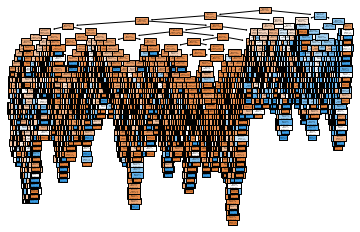

In [21]:
plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

## `DecisionTreeClassifier()` with Custom Hyperparameters

In [26]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/7VeUPuFGJHk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [27]:
model = DecisionTreeClassifier()

In [28]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### 1st Configuration

#### Accuracy

##### > In `train` data

In [29]:
model_dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=150)

In [30]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=150)

In [31]:
model_dt.score(X_train, y_train)

0.8186567164179105

##### > In `test` data

In [32]:
model_dt.score(X_test, y_test)

0.8215151515151515

#### Model Visualization

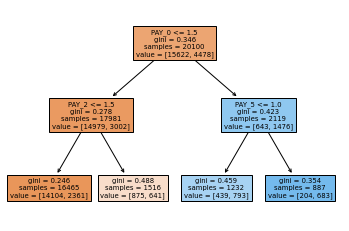

In [33]:
plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

### 2nd Configuration

#### Accuracy

##### > In `train` data

In [34]:
model_dt = DecisionTreeClassifier(max_depth=3)

In [35]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
model_dt.score(X_train, y_train)

0.8207960199004976

##### > In `test` data

In [37]:
model_dt.score(X_test, y_test)

0.8222222222222222

#### Model Visualization

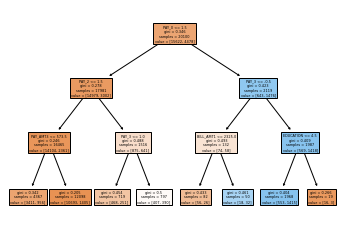

In [39]:
plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

### 3rd Configuration

#### Accuracy

##### > In `train` data

In [40]:
model_dt = DecisionTreeClassifier(max_depth=4)

In [41]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [42]:
model_dt.score(X_train, y_train)

0.8232338308457712

##### > In `test` data

In [43]:
model_dt.score(X_test, y_test)

0.8205050505050505

#### Model Visualization

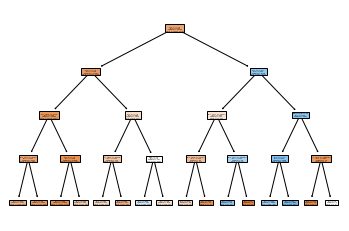

In [45]:
plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

### 4th Configuration

#### Accuracy

##### > In `train` data

In [46]:
model_dt = DecisionTreeClassifier(min_samples_leaf=100)

In [47]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=100)

In [48]:
model_dt.score(X_train, y_train)

0.8244278606965174

##### > In `test` data

In [49]:
model_dt.score(X_test, y_test)

0.8161616161616162

#### Model Visualization

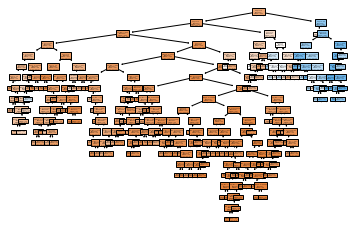

In [50]:
plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

### 5th Configuration

#### Accuracy

##### > In `train` data

In [51]:
model_dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

In [52]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

In [53]:
model_dt.score(X_train, y_train)

0.8237313432835821

##### > In `test` data

In [54]:
model_dt.score(X_test, y_test)

0.8177777777777778

#### Model Visualization

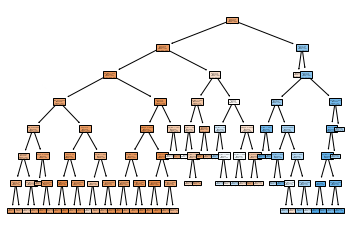

In [55]:
plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

## `GridSearchCV()` to find Best Hyperparameters

- [ ] How many scores for each fold?

<img src="src/grid_search_cross_validation.png" style="margin-top: 100px"/>

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
model_dt = DecisionTreeClassifier()

In [65]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [66]:
param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 50, 100, 200, 400, 800, 1600],
    'criterion': ['gini', 'entropy']
}

In [67]:
cv = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, verbose=1)

In [68]:
5*6*7*2

420

In [69]:
6*7*2

84

In [70]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 50, 100, 200, 400, 800, 1600]},
             verbose=1)

In [71]:
cv = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, verbose=2)

In [72]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   0.3s
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   0.3s
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   0.3s
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   0.3s
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_s

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 50, 100, 200, 400, 800, 1600]},
             verbose=2)

In [74]:
cv.__dict__

{'scoring': None,
 'estimator': DecisionTreeClassifier(),
 'n_jobs': None,
 'refit': True,
 'cv': 5,
 'verbose': 2,
 'pre_dispatch': '2*n_jobs',
 'error_score': nan,
 'return_train_score': False,
 'param_grid': {'max_depth': [None, 2, 3, 4, 5, 10],
  'min_samples_leaf': [1, 50, 100, 200, 400, 800, 1600],
  'criterion': ['gini', 'entropy']},
 'multimetric_': False,
 'best_index_': 72,
 'best_score_': 0.8199502487562189,
 'best_params_': {'criterion': 'entropy',
  'max_depth': 5,
  'min_samples_leaf': 100},
 'best_estimator_': DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100),
 'refit_time_': 0.1121819019317627,
 'feature_names_in_': array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
        'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
        'PAY_AMT6'], dtype=object),
 'scorer_': <functio

In [75]:
cv.cv_results_['mean_test_score'].shape

(84,)

In [76]:
cv.cv_results_['mean_test_score']

array([0.72661692, 0.8140796 , 0.81860697, 0.81860697, 0.81865672,
       0.81865672, 0.81865672, 0.81900498, 0.81900498, 0.81900498,
       0.81865672, 0.81865672, 0.81865672, 0.81865672, 0.81925373,
       0.81905473, 0.81855721, 0.8181592 , 0.81865672, 0.81865672,
       0.81865672, 0.81950249, 0.81895522, 0.81900498, 0.81860697,
       0.81865672, 0.81865672, 0.81865672, 0.81915423, 0.81965174,
       0.81960199, 0.81860697, 0.81865672, 0.81865672, 0.81865672,
       0.80557214, 0.81512438, 0.81860697, 0.81860697, 0.81865672,
       0.81865672, 0.81865672, 0.73298507, 0.81288557, 0.81855721,
       0.81860697, 0.81865672, 0.81865672, 0.81865672, 0.81875622,
       0.81875622, 0.81875622, 0.81865672, 0.81865672, 0.81865672,
       0.81865672, 0.81900498, 0.81885572, 0.81850746, 0.8181592 ,
       0.81865672, 0.81865672, 0.81865672, 0.81895522, 0.81895522,
       0.81895522, 0.81860697, 0.81865672, 0.81865672, 0.81865672,
       0.81925373, 0.81975124, 0.81995025, 0.81860697, 0.81865

In [77]:
cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100)

In [78]:
cv.score(X_test, y_test)

0.8186868686868687

In [79]:
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100)

In [80]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100)

In [81]:
model_dt.score(X_test, y_test)

0.8186868686868687

## Other Models

### Support Vector Machines `SVC()`

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [90]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [93]:
X_norm = pd.DataFrame(scaler.fit_transform(X))

In [94]:
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X_norm, y, test_size=0.33, random_state=42)

In [95]:
from sklearn.svm import SVC

In [96]:
sv = SVC()

In [97]:
sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [98]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'kernel']
}

In [99]:
cv_svc = GridSearchCV(estimator=sv, param_grid=param_grid, verbose=2)

In [100]:
cv_svc.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   5.9s
[CV] END ...............................C=0.1, kernel=linear; total time=   5.9s
[CV] END ...............................C=0.1, kernel=linear; total time=   5.8s
[CV] END ...............................C=0.1, kernel=linear; total time=   6.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   5.8s
[CV] END ...............................C=0.1, kernel=kernel; total time=   0.0s
[CV] END ...............................C=0.1, kernel=kernel; total time=   0.0s
[CV] END ...............................C=0.1, kernel=kernel; total time=   0.0s
[CV] END ...............................C=0.1, kernel=kernel; total time=   0.0s
[CV] END ...............................C=0.1, kernel=kernel; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   5.9s
[CV] END .................................C=1, ke

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'kernel']},
             verbose=2)

In [101]:
cv_svc.best_estimator_

SVC(C=1, kernel='linear')

In [102]:
cv_svc.score(X_test, y_test)

0.8105050505050505

In [103]:
cv_svc.cv_results_['mean_test_score']

array([0.78263682,        nan, 0.80875622,        nan, 0.80855721,
              nan])

## `KNeighborsClassifier()`

In [104]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HVXime0nQeI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
kn = KNeighborsClassifier()

In [107]:
kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [108]:
import sklearn

In [111]:
sklearn.metrics.DistanceMetric()

NotImplementedError: DistanceMetric is an abstract class

In [113]:
param_grid = {
    'leaf_size': [10, 20, 30, 50],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'n_neighbors': [3, 5, 10, 20]
}

In [114]:
cv_kn = GridSearchCV(estimator=kn, param_grid=param_grid, verbose=2)

In [115]:
cv_kn.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   1.5s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   1.1s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   1.1s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   1.1s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   1.1s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   1.3s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   1.3s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   1.3s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   1.3s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   1.3s
[CV] END .....leaf_size=10, metric=minkowski, n_neighbors=10; total time=   1.3s
[CV] END .....leaf_size=10, metric=minkowski, n

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 50],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 10, 20]},
             verbose=2)

In [117]:
cv_kn.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=20)

In [119]:
cv_kn.score(X_test, y_test)

0.8076767676767677

In [120]:
cv_kn.cv_results_['mean_test_score']

array([0.77263682, 0.79154229, 0.80577114, 0.81099502, 0.77263682,
       0.79154229, 0.80577114, 0.81099502, 0.77134328, 0.79029851,
       0.80557214, 0.8099005 , 0.77263682, 0.79154229, 0.80577114,
       0.81099502, 0.77263682, 0.79154229, 0.80577114, 0.81099502,
       0.77134328, 0.79029851, 0.80557214, 0.8099005 , 0.77263682,
       0.79154229, 0.80577114, 0.81099502, 0.77263682, 0.79154229,
       0.80577114, 0.81099502, 0.77134328, 0.79029851, 0.80557214,
       0.8099005 , 0.77263682, 0.79154229, 0.80577114, 0.81099502,
       0.77263682, 0.79154229, 0.80577114, 0.81099502, 0.77134328,
       0.79029851, 0.80557214, 0.8099005 ])

# Best Model with Best Hyperparameters

In [126]:
dic_results = {
    'model': [
        cv.best_estimator_,
        cv_kn.best_estimator_,
        cv_svc.best_estimator_
    ],
    
    'score': [
        cv.score(X_test, y_test),
        cv_kn.score(X_test, y_test),
        cv_svc.score(X_test, y_test)
    ]
}

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [127]:
pd.DataFrame(dic_results)

,model,score
0,"DecisionTreeClassifier(criterion='entropy', ma...",0.782020
1,"KNeighborsClassifier(leaf_size=10, n_neighbors...",0.807677
2,"SVC(C=1, kernel='linear')",0.810505


<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.